
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 40</p>
## <p style="text-align: center;">Due: Wed, October 4th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer:

In the k-nearest neighbor model, k is decided to find a balance in bias and variance. A high value of k leads to high bias and low variance. Conversely, a low k values yields a low bias, but high variance. This needs to be selected appropriately in order to find a balance of both that best associates with the problem that it is trying to represent.


# Question 2: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land), "inst" (measure of political stability in the executive branch), "ecks" (number of violent internal war incidents ) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 3 scatterplots of "rent" against "demo_score", "inst" against "demo_score" and "ecks" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import math
from pylab import *

%matplotlib inline

In [2]:
russett = pd.read_table('/Users/brettscroggins/Downloads/russett_full_v2.csv', sep=',')
russett[:5]

,country,gini,farm,rent,gnpr,labo,inst,ecks,death,demo_class,demo_score
0,Argentina,86.3,98.2,47.9,374,25,16.6,47.0,217,2,35
1,Australia,92.9,99.6,30.0,1215,14,19.3,0.0,0,1,89
2,Austria,74.0,97.4,25.7,532,32,15.8,4.0,0,2,52
3,Belgium,58.7,85.8,98.3,1015,10,23.5,8.0,1,1,98
4,Bolivia,93.8,97.7,35.0,66,72,18.3,43.0,663,3,19


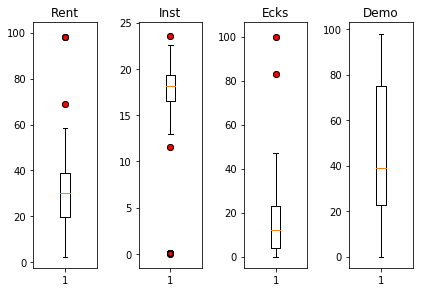

*** Note: The Demo Score boxplot has no outliers.


In [3]:
#### Box Plots
plots, (s1, s2, s3, s4) = plt.subplots(1, 4)
plots.tight_layout()

r1 = s1.boxplot(russett['rent'])
rent_out = russett['rent'].isin(r1['fliers'][0].get_data()[1])
rent_outliers = russett[rent_out]
s1.scatter(np.ones_like(rent_outliers['rent']),rent_outliers['rent'],c='red')
s1.set_title('Rent')

r2 = s2.boxplot(russett['inst'])
inst_out = russett['inst'].isin(r2['fliers'][0].get_data()[1])
inst_outliers = russett[inst_out]
s2.scatter(np.ones_like(inst_outliers['inst']),inst_outliers['inst'],c='red')
s2.set_title('Inst')

r3 = s3.boxplot(russett['ecks'])
ecks_out = russett['ecks'].isin(r3['fliers'][0].get_data()[1])
ecks_outliers = russett[ecks_out]
s3.scatter(np.ones_like(ecks_outliers['ecks']),ecks_outliers['ecks'],c='red')
s3.set_title('Ecks')

r4 = s4.boxplot(russett['demo_score'])
demo_out = russett['demo_score'].isin(r4['fliers'][0].get_data()[1])
demo_outliers = russett[demo_out]
s4.scatter(np.ones_like(demo_outliers['demo_score']),demo_outliers['demo_score'],c='red')
s4.set_title('Demo')

plt.show()
print "*** Note: The Demo Score boxplot has no outliers."

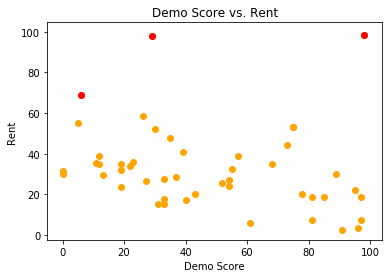

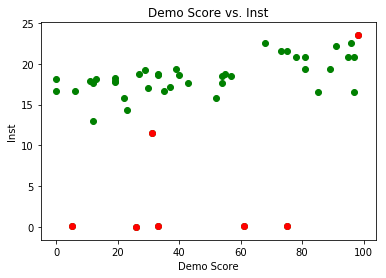

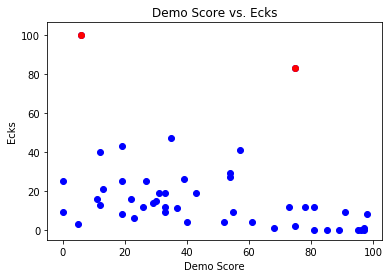

In [26]:
# Scatter Plots
# "rent" against "demo_score", "inst" against "demo_score" and "ecks" against "demo_score"

plt.scatter('demo_score','rent', data = russett, color = 'orange')
plt.scatter('demo_score','rent', data = rent_outliers, color = 'red')
plt.xlabel('Demo Score')
plt.ylabel('Rent')
plt.title('Demo Score vs. Rent')
plt.show()

plt.scatter('demo_score','inst', data = russett, color = 'green')
plt.scatter('demo_score','inst', data = inst_outliers, color = 'red')
plt.xlabel('Demo Score')
plt.ylabel('Inst')
plt.title('Demo Score vs. Inst')
plt.show()

plt.scatter('demo_score','ecks', data = russett, color = 'blue')
plt.scatter('demo_score','ecks', data = ecks_outliers, color = 'red')
plt.xlabel('Demo Score')
plt.ylabel('Ecks')
plt.title('Demo Score vs. Ecks')
plt.show()

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

In [5]:
from sklearn.model_selection import train_test_split

X = russett[['rent','inst','ecks']]
y = russett['demo_score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
train_pred = regr.predict(X_train)

print"\nX Train RMSE =", round(math.sqrt(mean_squared_error(y_train, train_pred)),3)

test_pred = regr.predict(X_test)

print"\nX Test RMSE =", round(math.sqrt(mean_squared_error(y_test, test_pred)),3)


X Train RMSE = 25.781

X Test RMSE = 32.581


c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

In [7]:
hub_regr = linear_model.HuberRegressor(alpha=0.0)
hub_regr.fit(X_train, y_train)
hub_train_pred = hub_regr.predict(X_train)

print"\nX Train RMSE =", round(math.sqrt(mean_squared_error(y_train, hub_train_pred)),3)

hub_test_pred = hub_regr.predict(X_test) 

print"\nX Test RMSE =", round(math.sqrt(mean_squared_error(y_test, hub_test_pred)),3)


X Train RMSE = 26.836

X Test RMSE = 29.166


d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

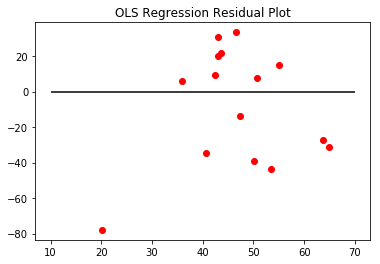

In [8]:
plt.scatter(test_pred, test_pred-y_test, color = 'red')
plt.hlines(y=0, xmin = 10, xmax = 70)
plt.title('OLS Regression Residual Plot')
plt.show()

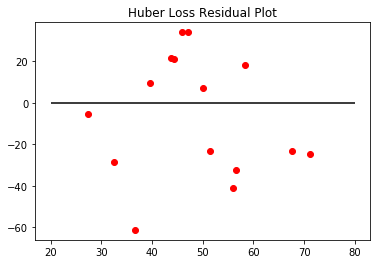

In [10]:
plt.scatter(hub_test_pred, hub_test_pred-y_test, color = 'red')
plt.hlines(y=0, xmin = 20, xmax = 80)
plt.title('Huber Loss Residual Plot')
plt.show()

# Question 3 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$ ± 0.02), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25?

    #### Answer for 1. $\epsilon$ = 0.03,  $\alpha$ = 0.01, so z = 1.65
    #### (i) p = 0.5
    n > $(0.5)(1-0.5)(\dfrac{1.65}{0.03})^2$
    n > 756.25
    We need to survey at least 757 people.

    #### (ii) p = 0.25
    n > $(0.25)(1-0.25)(\dfrac{1.65}{0.03})^2$
    n > 567.19
    We need to survey at least 568 people.
    
2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

    #### Answer for 2. n = 1000,  $\alpha$ = 0.02
    #### (i) if $\alpha$ is reduced to 0.01 and $\epsilon$ is kept constant
    z-score ratio = $\dfrac{2.58^2}{2.33^2}$
    z-score ratio $\approx$ 1.2261
    
    To find the amount needed to survey:
    $\approx$ 1.2261 * 1000
    $\approx$ 1226.10
    
    We need to survey at least 1227 people.

    #### (ii) if $\alpha$ is changed to 0.05 and $\epsilon$ is reduced by a factor of 2
    z-score and $\epsilon$ ratio $ = \dfrac{\dfrac{1.96^2}{0.5\epsilon^2}}{\dfrac{2.33^2}{\epsilon^2}}$
    
    z-score and $\epsilon$ ratio $\approx$ 2.8305
    
    To find the amount needed to survey:
    $\approx$ 2.8305 * 1000
    $\approx$ 2830.5
    
    We need to survey at least 2831 people.

# Question 4 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [11]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [12]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

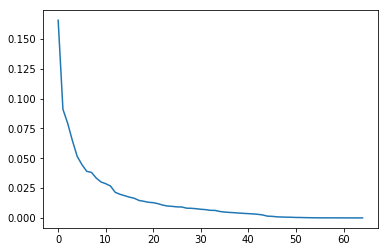

In [15]:
evr = pca.explained_variance_ratio_

# Plot of explained variance percentage by each added dimension:
plt.plot(evr)
plt.show()

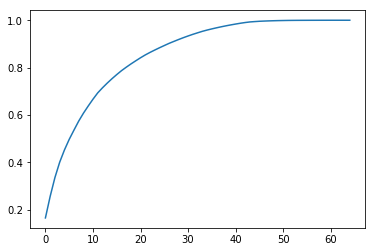

In [16]:
# Plot of cumulative explained variance proportion with each added dimension:
cum_var = np.cumsum(evr)
plt.plot(cum_var)
plt.show()

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

In [17]:
# Part b:
n = 30
model = PCA(n)
thirty = model.fit(X).explained_variance_ratio_
captured_pca = np.cumsum(thirty)
captured_pca

## From above:
# Over 30% explained at 3 components
# Over 60% explained at 9 components
# Over 90% explained at 27 components

array([ 0.16576031,  0.25686519,  0.33617548,  0.40088179,  0.45249643,
        0.49715739,  0.53623954,  0.57440436,  0.60785616,  0.63801793,
        0.66670709,  0.69344814,  0.71489443,  0.7347199 ,  0.75332222,
        0.77072435,  0.78721254,  0.80185535,  0.81579914,  0.82891484,
        0.8416891 ,  0.85362281,  0.86433991,  0.8743238 ,  0.88400049,
        0.89324873,  0.90240341,  0.91058314,  0.91864068,  0.92636405])

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. (This is called Principal Components Regression) Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

In [18]:
# Part c:

lr = linear_model.LinearRegression()

n1 = 3
n1_pca = PCA(n_components = n1)

n2 = 9
n2_pca = PCA(n_components = n2)

n3 = 27
n3_pca = PCA(n_components = n3)

In [22]:
# Model with 30% explained variance:
n1_fit = n1_pca.fit_transform(X)
n1_lr = lr.fit(n1_fit,y)
n1_pred = n1_lr.predict(n1_fit)
print"\n MSE =", round(mean_squared_error(n1_pred,y),3)


 MSE = 5120.606


In [23]:
# Model with 60% explained variance:
n2_fit = n2_pca.fit_transform(X)
n2_lr = lr.fit(n2_fit,y)
n2_pred = n2_lr.predict(n2_fit)
print"\n MSE =", round(mean_squared_error(n2_pred,y),3)


 MSE = 3942.787


In [24]:
# Model with 90% explained variance:
n3_fit = n3_pca.fit_transform(X)
n3_lr = lr.fit(n3_fit,y)
n3_pred = n3_lr.predict(n3_fit)
print"\n MSE =", round(mean_squared_error(n3_pred,y),3)


 MSE = 2857.426


# Question 5 -  Feature Selection ( 5 points )

Explain what you understand by the two wrapper methods for feature selection (forward and backward selection) (no more than 1 paragraph). 


## Answer:

Both forward and backward selection wrapper methods are feature selection methods of dimension reduction for models. Both begin by assigning a 'value' to each dimension based upon some defined metric. Forward selection then slowly builds from the most 'valuable' variable by iteratively adding the next most 'valuable' variable until the desired blend of accuracy and complexity is reached. Backward selection performs this in reverse; starting with all variables and slowly removing the lowest 'value' dimension until the desired blend is reached.